# **Computer Assignment 5 Phase 2**

Negar Moradi 810198543

In [ ]:
import cv2
import numpy as np
import os
import zipfile
import tensorflow as tf
from google.colab.patches import cv2_imshow
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras import callbacks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/AI/dataset.zip'
zip_object = zipfile.ZipFile(file = path , mode ='r')
zip_object.extractall('./')
zip_object.close()


# Visualizing and Preprocessing

In [ ]:
batch_size = 32
img_height = 256
img_width = 256
trdirectory = '/content/dataset/train'

In [ ]:
dataset_generator_train = ImageDataGenerator()
print("For train data: ")
train_data = dataset_generator_train.flow_from_directory(directory=trdirectory, target_size=(img_height,img_width),
                                                color_mode='grayscale',
                                                batch_size= batch_size,
                                                class_mode='categorical'
                                                )



For train data: 
Found 1945 images belonging to 4 classes.


In [ ]:
img_height = 80
img_width = 80
test_dir = '/content/dataset/test'
print("For test data: ")
test_gen = ImageDataGenerator(rescale=1./255)
test_dataset = test_gen.flow_from_directory(directory= test_dir,
                                            target_size=(img_height,img_width),
                                            color_mode='grayscale',
                                            batch_size= batch_size,
                                            class_mode='categorical' )

For test data: 
Found 833 images belonging to 4 classes.


In [ ]:
classes = np.unique(train_data.classes, return_counts = True)
print("classes for train data: ", classes)
classes_name = train_data.class_indices
print("names for train data: ", classes_name)

classes for train data:  (array([0, 1, 2, 3], dtype=int32), array([521, 462, 507, 455]))
names for train data:  {'bald_eagle': 0, 'elk': 1, 'racoon': 2, 'raven': 3}


classes: {'bald_eagle': 0, 'elk': 1, 'racoon': 2, 'raven': 3}


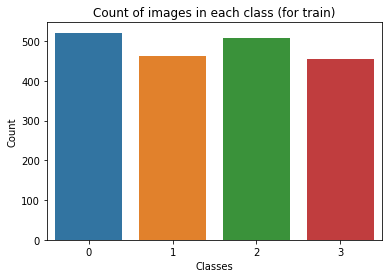

In [ ]:
plotc = sns.countplot(x = train_data.classes)
plotc.set_xlabel("Classes")
plotc.set_ylabel("Count")
plotc.set_title("Count of images in each class (for train)")
print("classes:" ,train_data.class_indices)

classes: {'bald_eagle': 0, 'elk': 1, 'racoon': 2, 'raven': 3}


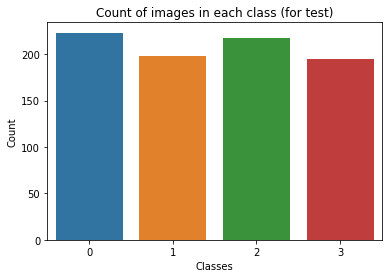

In [ ]:
plotc = sns.countplot(x = test_dataset.classes)
plotc.set_xlabel("Classes")
plotc.set_ylabel("Count")
plotc.set_title("Count of images in each class (for test)")
print("classes:" ,train_data.class_indices)

In [ ]:
classes_labels = list(train_data.class_indices.keys())
print("class labels: ", classes_labels)

class labels:  ['bald_eagle', 'elk', 'racoon', 'raven']


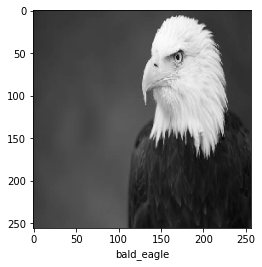

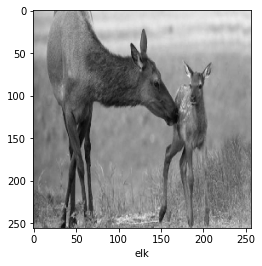

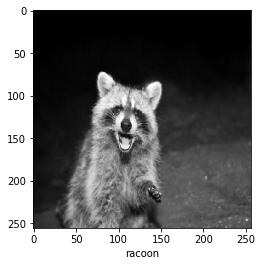

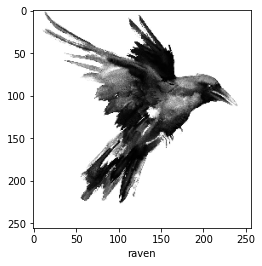

In [ ]:
cc = 0
class_c = len(classes_labels)
for images, labels in train_data:
  if cc == class_c:
    break
  for image, label in zip(images, labels):
    if label.argmax() == cc:
      plt.imshow(image.reshape((256, 256)), cmap = "gray")
      plt.xlabel(classes_labels[cc])
      plt.show( block=False )
      cc += 1

In [ ]:
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.20)
train_dataset = data_gen.flow_from_directory(directory=trdirectory, target_size=(img_height,img_width),
                                                color_mode='grayscale',
                                                batch_size= batch_size,
                                                class_mode='categorical',
                                                subset='training',
                                                seed = 23)
train_dataset_nosh = data_gen.flow_from_directory(directory=trdirectory, target_size=(img_height,img_width),
                                                color_mode='grayscale',
                                                batch_size= batch_size,
                                                class_mode='categorical',
                                                subset='training',
                                                shuffle= False)

Found 1557 images belonging to 4 classes.
Found 1557 images belonging to 4 classes.


In [ ]:
val_dataset = data_gen.flow_from_directory(directory=trdirectory, target_size=(img_height,img_width),
                                                color_mode='grayscale',
                                                batch_size= batch_size,
                                                class_mode='categorical',
                                                subset='validation',
                                                seed = 23 )
val_dataset_nosh = data_gen.flow_from_directory(directory=trdirectory, target_size=(img_height,img_width),
                                                color_mode='grayscale',
                                                batch_size= batch_size,
                                                class_mode='categorical',
                                                subset='validation',
                                                shuffle=False)

Found 388 images belonging to 4 classes.
Found 388 images belonging to 4 classes.


One-hot encoding

In [ ]:
onehot_vector = []
n_classes = list(train_data.class_indices.values())
for val in train_dataset.labels:
    row = [1 if i == val else 0 for i in n_classes]
    onehot_vector.append(row)
onehot_vector
#onehot_vector = np.asmatrix(onehot_vector, dtype=float)


[[1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0,

(The categorical class mode is used)

Building the network


In [ ]:
input = layers.Input(shape=(img_height,img_width,1))
out = layers.Flatten()(input)
out = layers.Dense(4096, activation = 'relu')(out)
out = layers.Dense(2048, activation = 'relu')(out)
out = layers.Dense(4, activation = 'softmax')(out)
model = models.Model(inputs = input, outputs = out)
model.compile(optimizer = optimizers.SGD(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 80, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 4096)              26218496  
                                                                 
 dense_1 (Dense)             (None, 2048)              8390656   
                                                                 
 dense_2 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 34,617,348
Trainable params: 34,617,348
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_dataset, epochs = 10, validation_data = val_dataset)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 59s 1s/step - loss: 1.4689 - accuracy: 0.3757 - val_loss: 1.1473 - val_accuracy: 0.5387
Epoch 2/10
49/49 [==============================] - 58s 1s/step - loss: 1.1359 - accuracy: 0.5035 - val_loss: 1.1231 - val_accuracy: 0.5464
Epoch 3/10
49/49 [==============================] - 58s 1s/step - loss: 1.1019 - accuracy: 0.5241 - val_loss: 1.1902 - val_accuracy: 0.3969
Epoch 4/10
49/49 [==============================] - 58s 1s/step - loss: 1.0216 - accuracy: 0.5729 - val_loss: 1.0097 - val_accuracy: 0.6108
Epoch 5/10
49/49 [==============================] - 58s 1s/step - loss: 0.9825 - accuracy: 0.5973 - val_loss: 1.1098 - val_accuracy: 0.4897
Epoch 6/10
49/49 [==============================] - 58s 1s/step - loss: 0.9464 - accuracy: 0.6191 - val_loss: 1.0411 - val_accuracy: 0.5258
Epoch 7/10
49/49 [==============================] - 58s 1s/step - loss: 0.8982 - accuracy: 0.6602 - val_loss: 0.9933 - val_accuracy: 0.5851
Epoch 8/10
49/49 [=============

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
def plot_loss(hist):
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.plot(hist.history['val_loss'])
  ax.plot(hist.history['loss'])
  ax.set_title('model loss')
  ax.set_ylabel('loss')
  ax.set_xlabel('epoch')
  ax.legend(['val', 'train'])
  plt.show(block=False)

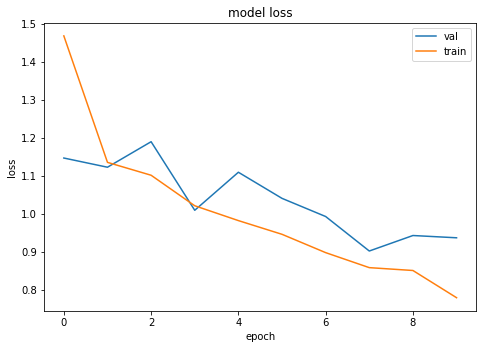

In [ ]:
plot_loss(history)

In [ ]:
def plot_acc(hist):
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.plot(hist.history['val_accuracy'])
  ax.plot(hist.history['accuracy'])
  ax.set_title('model accuracy')
  ax.set_ylabel('accuracy')
  ax.set_xlabel('epoch')
  ax.legend(['val', 'train'])
  plt.show(block=False)

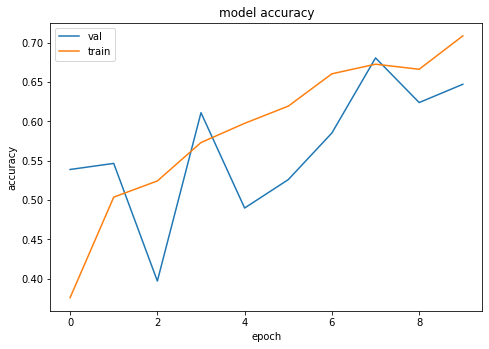

In [ ]:
plot_acc(history)

### for train

In [ ]:
prediction = model.predict(train_dataset_nosh)
prediction

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


array([[0.5021026 , 0.16083016, 0.07369442, 0.26337275],
       [0.8872437 , 0.05647181, 0.02470975, 0.03157477],
       [0.7983744 , 0.06082787, 0.12212453, 0.01867312],
       ...,
       [0.42967066, 0.13642712, 0.14537318, 0.2885291 ],
       [0.5925287 , 0.05735828, 0.02794236, 0.32217062],
       [0.48650724, 0.07169921, 0.02652314, 0.4152704 ]], dtype=float32)

In [ ]:
predictions = np.argmax(prediction, axis = 1)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(train_dataset_nosh.labels, predictions)

0.7186897880539499

In [ ]:
print(classification_report(train_dataset_nosh.labels, predictions))

              precision    recall  f1-score   support

           0       0.52      0.97      0.68       417
           1       0.88      0.72      0.79       370
           2       0.95      0.55      0.70       406
           3       0.91      0.62      0.74       364

    accuracy                           0.72      1557
   macro avg       0.82      0.71      0.73      1557
weighted avg       0.81      0.72      0.72      1557



### for validation

In [ ]:
def print_par(model, dataset, str):
  print(str)
  prediction = model.predict(dataset)
  predictions = np.argmax(prediction, axis = 1)
  print(accuracy_score(dataset.labels, predictions))
  print(classification_report(dataset.labels, predictions))


In [ ]:
print_par(model, val_dataset_nosh, "validation")

validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.6469072164948454
              precision    recall  f1-score   support

           0       0.48      0.92      0.64       104
           1       0.81      0.63      0.71        92
           2       0.79      0.49      0.60       101
           3       0.86      0.53      0.65        91

    accuracy                           0.65       388
   macro avg       0.73      0.64      0.65       388
weighted avg       0.73      0.65      0.65       388



we use rescale to normalize our data

## Tanh

In [ ]:
input = layers.Input(shape=(img_height,img_width,1))
out = layers.Flatten()(input)
out = layers.Dense(4096, activation = 'tanh')(out)
out = layers.Dense(2048, activation = 'tanh')(out)
out = layers.Dense(4, activation = 'softmax')(out)
model = models.Model(inputs = input, outputs = out)
model.compile(optimizer = optimizers.SGD(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 80, 80, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_3 (Dense)             (None, 4096)              26218496  
                                                                 
 dense_4 (Dense)             (None, 2048)              8390656   
                                                                 
 dense_5 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 34,617,348
Trainable params: 34,617,348
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_dataset, epochs = 10, validation_data = val_dataset)

Epoch 1/10
 8/49 [===>..........................] - ETA: 35s - loss: 5.7764 - accuracy: 0.2461

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 60s 1s/step - loss: 3.6813 - accuracy: 0.2974 - val_loss: 3.0979 - val_accuracy: 0.2603
Epoch 2/10
49/49 [==============================] - 58s 1s/step - loss: 1.7709 - accuracy: 0.3802 - val_loss: 1.5964 - val_accuracy: 0.3247
Epoch 3/10
49/49 [==============================] - 58s 1s/step - loss: 1.5211 - accuracy: 0.4021 - val_loss: 2.0383 - val_accuracy: 0.3557
Epoch 4/10
49/49 [==============================] - 58s 1s/step - loss: 1.2424 - accuracy: 0.4791 - val_loss: 1.1505 - val_accuracy: 0.5206
Epoch 5/10
49/49 [==============================] - 58s 1s/step - loss: 1.2275 - accuracy: 0.4862 - val_loss: 1.1396 - val_accuracy: 0.4588
Epoch 6/10
49/49 [==============================] - 58s 1s/step - loss: 1.1527 - accuracy: 0.5048 - val_loss: 1.0755 - val_accuracy: 0.5387
Epoch 7/10
49/49 [==============================] - 58s 1s/step - loss: 1.1171 - accuracy: 0.5459 - val_loss: 1.0416 - val_accuracy: 0.5593
Epoch 8/10
49/49 [=============

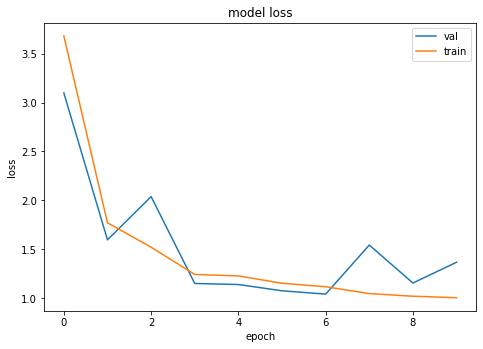

In [ ]:
plot_loss(history)

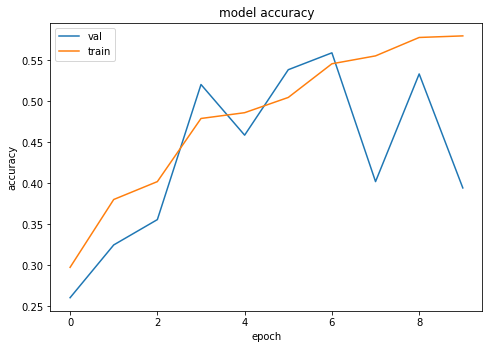

In [ ]:
plot_acc(history)

In [ ]:
print_par(model, train_dataset_nosh, "test")
print_par(model, val_dataset_nosh, "validation")
plt.show(block=False)

test


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.457931920359666
              precision    recall  f1-score   support

           0       0.91      0.21      0.34       417
           1       0.32      0.99      0.49       370
           2       0.93      0.13      0.23       406
           3       0.78      0.57      0.66       364

    accuracy                           0.46      1557
   macro avg       0.74      0.47      0.43      1557
weighted avg       0.75      0.46      0.42      1557

validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.3943298969072165
              precision    recall  f1-score   support

           0       0.70      0.15      0.25       104
           1       0.30      0.96      0.46        92
           2       0.67      0.08      0.14       101
           3       0.68      0.45      0.54        91

    accuracy                           0.39       388
   macro avg       0.59      0.41      0.35       388
weighted avg       0.59      0.39      0.34       388



## Sigmoid

In [ ]:
input = layers.Input(shape=(img_height,img_width,1))
out = layers.Flatten()(input)
out = layers.Dense(4096, activation = 'LeakyReLU')(out)
out = layers.Dense(2048, activation = 'LeakyReLU')(out)
out = layers.Dense(4, activation = 'softmax')(out)
model = models.Model(inputs = input, outputs = out)
model.compile(optimizer = optimizers.SGD(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 80, 80, 1)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 6400)              0         
                                                                 
 dense_6 (Dense)             (None, 4096)              26218496  
                                                                 
 dense_7 (Dense)             (None, 2048)              8390656   
                                                                 
 dense_8 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 34,617,348
Trainable params: 34,617,348
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_dataset, epochs = 10, validation_data = val_dataset)

Epoch 1/10
12/49 [======>.......................] - ETA: 34s - loss: 2.5790 - accuracy: 0.2812

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 59s 1s/step - loss: 1.6529 - accuracy: 0.3468 - val_loss: 1.1897 - val_accuracy: 0.5180
Epoch 2/10
49/49 [==============================] - 58s 1s/step - loss: 1.2113 - accuracy: 0.4522 - val_loss: 1.3553 - val_accuracy: 0.3634
Epoch 3/10
49/49 [==============================] - 59s 1s/step - loss: 1.1391 - accuracy: 0.5042 - val_loss: 1.1089 - val_accuracy: 0.4871
Epoch 4/10
49/49 [==============================] - 58s 1s/step - loss: 1.1002 - accuracy: 0.5177 - val_loss: 1.2268 - val_accuracy: 0.4768
Epoch 5/10
49/49 [==============================] - 58s 1s/step - loss: 1.0469 - accuracy: 0.5787 - val_loss: 1.0534 - val_accuracy: 0.5387
Epoch 6/10
49/49 [==============================] - 58s 1s/step - loss: 1.0079 - accuracy: 0.5665 - val_loss: 1.0351 - val_accuracy: 0.6134
Epoch 7/10
49/49 [==============================] - 58s 1s/step - loss: 0.9569 - accuracy: 0.5915 - val_loss: 1.0726 - val_accuracy: 0.5052
Epoch 8/10
49/49 [=============

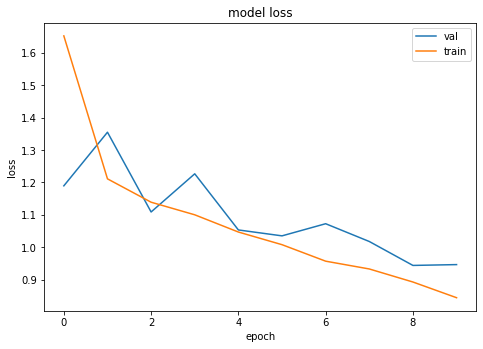

In [ ]:
plot_loss(history)

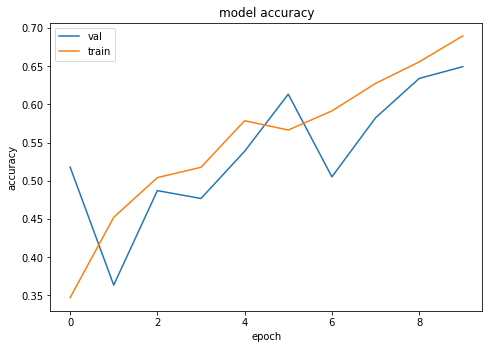

In [ ]:
plot_acc(history)

In [ ]:
print_par(model, train_dataset_nosh, "test")
print_par(model, val_dataset_nosh, "validation")
plt.show(block=False)

test


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.7315350032113038
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       417
           1       0.63      0.89      0.74       370
           2       0.92      0.62      0.74       406
           3       0.86      0.63      0.73       364

    accuracy                           0.73      1557
   macro avg       0.77      0.73      0.73      1557
weighted avg       0.77      0.73      0.73      1557

validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.6494845360824743
              precision    recall  f1-score   support

           0       0.58      0.76      0.66       104
           1       0.58      0.84      0.69        92
           2       0.78      0.47      0.58       101
           3       0.83      0.54      0.65        91

    accuracy                           0.65       388
   macro avg       0.69      0.65      0.65       388
weighted avg       0.69      0.65      0.64       388




# **Optimizers**
### Momentum

Momentum in neural networks is a variant of the stochastic gradient descent. It replaces the gradient with a momentum which is an aggregate of gradients as very well explained here. It is also the common name given to the momentum factor, as in your case. <br>
The use of momentum is known to improve the convergence of neural networks during training.  

### What is the benefit of using momentum optimization?
Momentum is most useful in optimization problems where the objective function has a large amount of curvature (e.g. changes a lot), meaning that the gradient may change a lot over relatively small regions of the search space.<br>
Thus momentum in neural nets helps them get out of local minima points so that a more important global minimum is found. 


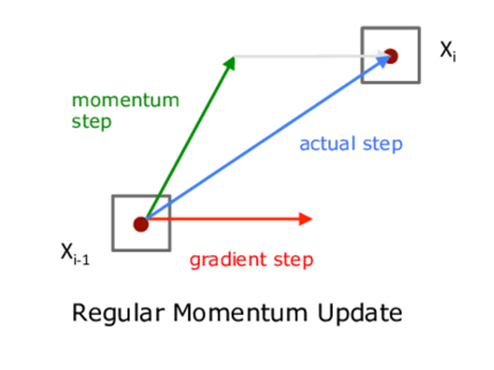

### **Momentum = 0.5**

In [ ]:
input = layers.Input(shape=(img_height,img_width,1))
out = layers.Flatten()(input)
out = layers.Dense(4096, activation = 'relu')(out)
out = layers.Dense(2048, activation = 'relu')(out)
out = layers.Dense(4, activation = 'softmax')(out)
model = models.Model(inputs = input, outputs = out)
model.compile(optimizer = optimizers.SGD(learning_rate = 0.01, momentum=0.5), loss = 'categorical_crossentropy', metrics = ["accuracy"])
print(model.summary())
history = model.fit(train_dataset, epochs = 10, validation_data = val_dataset)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 80, 80, 1)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 6400)              0         
                                                                 
 dense_9 (Dense)             (None, 4096)              26218496  
                                                                 
 dense_10 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_11 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 34,617,348
Trainable params: 34,617,348
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 60s 1s/step - loss: 1.3659 - accuracy: 0.3982 - val_loss: 1.1371 - val_accuracy: 0.5490
Epoch 2/10
49/49 [==============================] - 59s 1s/step - loss: 1.1483 - accuracy: 0.4990 - val_loss: 1.1072 - val_accuracy: 0.5515
Epoch 3/10
49/49 [==============================] - 58s 1s/step - loss: 1.0279 - accuracy: 0.5652 - val_loss: 0.9775 - val_accuracy: 0.6443
Epoch 4/10
49/49 [==============================] - 58s 1s/step - loss: 0.9380 - accuracy: 0.6358 - val_loss: 0.9764 - val_accuracy: 0.6005
Epoch 5/10
49/49 [==============================] - 59s 1s/step - loss: 0.8794 - accuracy: 0.6442 - val_loss: 1.1567 - val_accuracy: 0.5077
Epoch 6/10
49/49 [==============================] - 62s 1s/step - loss: 0.8689 - accuracy: 0.6480 - val_loss: 0.9175 - val_accuracy: 0.6366
Epoch 7/10
49/49 [==============================] - 59s 1s/step - loss: 0.7440 - accuracy: 0.7328 - val_loss: 0.8358 - val_accuracy: 0.6830
Epoch 8/10
49/49 [=============

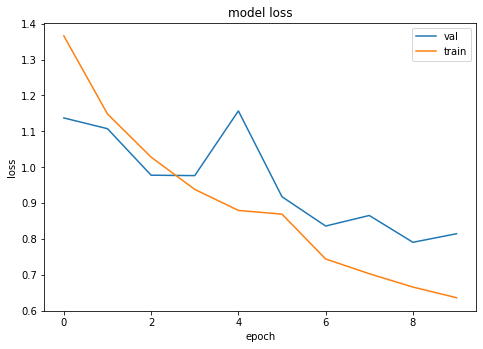

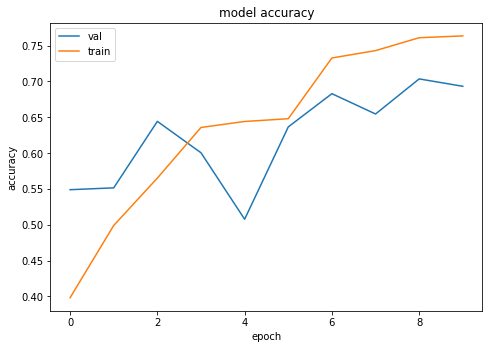

In [ ]:
plot_loss(history)
plot_acc(history)
plt.show(block=False)

In [ ]:
print_par(model, train_dataset_nosh, "test")
print_par(model, val_dataset_nosh, "validation")
plt.show(block=False)

test


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.8208092485549133
              precision    recall  f1-score   support

           0       0.96      0.60      0.74       417
           1       0.83      0.88      0.85       370
           2       0.92      0.89      0.91       406
           3       0.67      0.93      0.78       364

    accuracy                           0.82      1557
   macro avg       0.84      0.83      0.82      1557
weighted avg       0.85      0.82      0.82      1557

validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.6932989690721649
              precision    recall  f1-score   support

           0       0.88      0.43      0.58       104
           1       0.74      0.76      0.75        92
           2       0.77      0.75      0.76       101
           3       0.54      0.86      0.66        91

    accuracy                           0.69       388
   macro avg       0.73      0.70      0.69       388
weighted avg       0.74      0.69      0.69       388



### **Momentum = 0.9**

In [ ]:
input = layers.Input(shape=(img_height,img_width,1))
out = layers.Flatten()(input)
out = layers.Dense(4096, activation = 'relu')(out)
out = layers.Dense(2048, activation = 'relu')(out)
out = layers.Dense(4, activation = 'softmax')(out)
model = models.Model(inputs = input, outputs = out)
model.compile(optimizer = optimizers.SGD(learning_rate = 0.01, momentum=0.9), loss = 'categorical_crossentropy', metrics = ["accuracy"])
print(model.summary())
history = model.fit(train_dataset, epochs = 10, validation_data = val_dataset)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 80, 80, 1)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 6400)              0         
                                                                 
 dense_12 (Dense)            (None, 4096)              26218496  
                                                                 
 dense_13 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_14 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 34,617,348
Trainable params: 34,617,348
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
14/49 [=======>................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 60s 1s/step - loss: 1.5433 - accuracy: 0.3545 - val_loss: 1.2003 - val_accuracy: 0.4381
Epoch 2/10
49/49 [==============================] - 58s 1s/step - loss: 1.2233 - accuracy: 0.4117 - val_loss: 1.1951 - val_accuracy: 0.4613
Epoch 3/10
49/49 [==============================] - 60s 1s/step - loss: 1.1675 - accuracy: 0.4547 - val_loss: 1.0560 - val_accuracy: 0.5412
Epoch 4/10
49/49 [==============================] - 62s 1s/step - loss: 1.0660 - accuracy: 0.5363 - val_loss: 1.0312 - val_accuracy: 0.5490
Epoch 5/10
49/49 [==============================] - 59s 1s/step - loss: 0.9853 - accuracy: 0.5716 - val_loss: 1.1192 - val_accuracy: 0.4742
Epoch 6/10
49/49 [==============================] - 59s 1s/step - loss: 0.9873 - accuracy: 0.5812 - val_loss: 1.0456 - val_accuracy: 0.5335
Epoch 7/10
49/49 [==============================] - 59s 1s/step - loss: 0.9846 - accuracy: 0.5870 - val_loss: 1.0407 - val_accuracy: 0.5825
Epoch 8/10
49/49 [=============

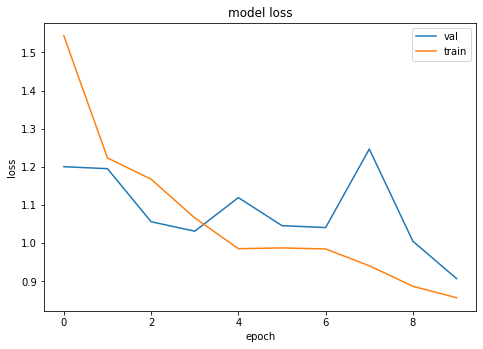

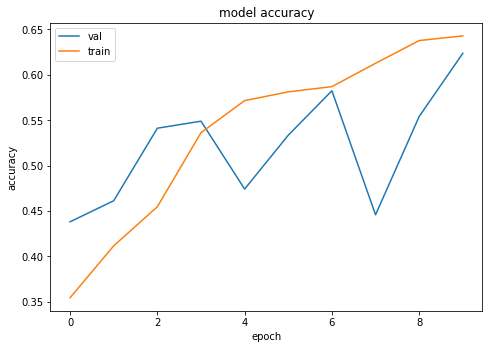

In [ ]:
plot_loss(history)
plot_acc(history)
plt.show(block=False)

In [ ]:
print_par(model, train_dataset_nosh, "test")
print_par(model, val_dataset_nosh, "validation")
plt.show(block=False)

test


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.7482337829158638
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       417
           1       0.71      0.85      0.77       370
           2       0.82      0.87      0.84       406
           3       0.89      0.49      0.63       364

    accuracy                           0.75      1557
   macro avg       0.77      0.74      0.74      1557
weighted avg       0.77      0.75      0.74      1557

validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.6237113402061856
              precision    recall  f1-score   support

           0       0.55      0.65      0.60       104
           1       0.65      0.65      0.65        92
           2       0.61      0.73      0.67       101
           3       0.80      0.44      0.57        91

    accuracy                           0.62       388
   macro avg       0.65      0.62      0.62       388
weighted avg       0.65      0.62      0.62       388



Too much of momentum may create issues as well as systems that are not stable may create oscillations that grow in magnitude, in such cases one needs to add decay terms and so on.

At higher momentum, the model almost becomes random, and the weights change more and more in each propagation. The algorithm might miss the optimal value by jumping over the minimum value with a huge step if the momentum value is too large. When momentum is really low, it can be hard to learn and get stuck in a local minimum.

So a really high value for the momentum term may not always be the best choice, as it may miss the minimum. It also means that the convergence will happen fast.Possibly a good choice would be to start with little momentum values and then gradually increase them.  


## Adam



Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.
adam has so many effective features:

    

1.   Straightforward to implement
2.   Little memory requirements
3.   Appropriate for problems with very noisy and/or sparse gradients
4.   Computationally efficient

...




In [ ]:
input = layers.Input(shape=(img_height,img_width,1))
out = layers.Flatten()(input)
out = layers.Dense(4096, activation = 'relu')(out)
out = layers.Dense(2048, activation = 'relu')(out)
out = layers.Dense(4, activation = 'softmax')(out)
model = models.Model(inputs = input, outputs = out)
model.compile(optimizer = optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ["accuracy"])
print(model.summary())
history = model.fit(train_dataset, epochs = 10, validation_data = val_dataset)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 80, 80, 1)]       0         
                                                                 
 flatten_5 (Flatten)         (None, 6400)              0         
                                                                 
 dense_15 (Dense)            (None, 4096)              26218496  
                                                                 
 dense_16 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_17 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 34,617,348
Trainable params: 34,617,348
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
 7/49 [===>....................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 63s 1s/step - loss: 4.4868 - accuracy: 0.3378 - val_loss: 1.1596 - val_accuracy: 0.4510
Epoch 2/10
49/49 [==============================] - 60s 1s/step - loss: 1.2369 - accuracy: 0.4271 - val_loss: 1.2350 - val_accuracy: 0.4485
Epoch 3/10
49/49 [==============================] - 64s 1s/step - loss: 1.1845 - accuracy: 0.4560 - val_loss: 1.1485 - val_accuracy: 0.4923
Epoch 4/10
49/49 [==============================] - 61s 1s/step - loss: 1.1002 - accuracy: 0.4920 - val_loss: 1.0519 - val_accuracy: 0.5309
Epoch 5/10
49/49 [==============================] - 61s 1s/step - loss: 1.0966 - accuracy: 0.5189 - val_loss: 1.0551 - val_accuracy: 0.5309
Epoch 6/10
49/49 [==============================] - 61s 1s/step - loss: 1.0557 - accuracy: 0.5241 - val_loss: 1.0563 - val_accuracy: 0.5232
Epoch 7/10
49/49 [==============================] - 61s 1s/step - loss: 1.0328 - accuracy: 0.5478 - val_loss: 1.1717 - val_accuracy: 0.4897
Epoch 8/10
49/49 [=============

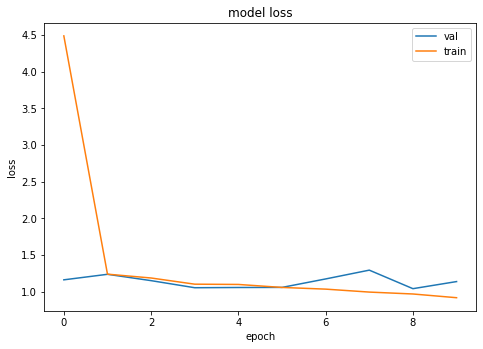

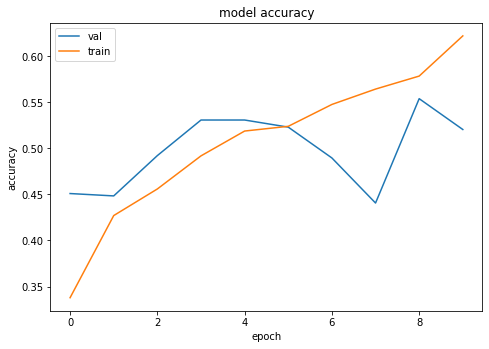

In [ ]:
plot_loss(history)
plot_acc(history)
plt.show(block=False)

In [ ]:
print_par(model, train_dataset_nosh, "test")
print_par(model, val_dataset_nosh, "validation")
plt.show(block=False)

test


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.5870263326910726
              precision    recall  f1-score   support

           0       0.46      0.44      0.45       417
           1       0.84      0.59      0.69       370
           2       0.89      0.45      0.60       406
           3       0.48      0.90      0.62       364

    accuracy                           0.59      1557
   macro avg       0.66      0.60      0.59      1557
weighted avg       0.66      0.59      0.59      1557

validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.520618556701031
              precision    recall  f1-score   support

           0       0.43      0.45      0.44       104
           1       0.62      0.46      0.52        92
           2       0.84      0.37      0.51       101
           3       0.46      0.84      0.59        91

    accuracy                           0.52       388
   macro avg       0.59      0.53      0.52       388
weighted avg       0.59      0.52      0.51       388



When compared to SGD Momentum, Adam often misses the optimal solution and doesn't produce results as good as SGD Momentum.
However, it is faster than the SGD algorithm.  

### **Epochs**



In [ ]:
input = layers.Input(shape=(img_height,img_width,1))
out = layers.Flatten()(input)
out = layers.Dense(4096, activation = 'relu')(out)
out = layers.Dense(2048, activation = 'relu')(out)
out = layers.Dense(4, activation = 'softmax')(out)
model = models.Model(inputs = input, outputs = out)
model.compile(optimizer = optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ["accuracy"])
print(model.summary())
history = model.fit(train_dataset, epochs = 20, validation_data = val_dataset)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 80, 80, 1)]       0         
                                                                 
 flatten_6 (Flatten)         (None, 6400)              0         
                                                                 
 dense_18 (Dense)            (None, 4096)              26218496  
                                                                 
 dense_19 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_20 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 34,617,348
Trainable params: 34,617,348
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
18/49 [==========>.............

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 62s 1s/step - loss: 5.0191 - accuracy: 0.3237 - val_loss: 1.2656 - val_accuracy: 0.4253
Epoch 2/20
49/49 [==============================] - 61s 1s/step - loss: 1.2118 - accuracy: 0.4335 - val_loss: 1.1456 - val_accuracy: 0.4562
Epoch 3/20
49/49 [==============================] - 60s 1s/step - loss: 1.1564 - accuracy: 0.4560 - val_loss: 1.1034 - val_accuracy: 0.4948
Epoch 4/20
49/49 [==============================] - 61s 1s/step - loss: 1.1427 - accuracy: 0.4759 - val_loss: 1.1464 - val_accuracy: 0.4871
Epoch 5/20
49/49 [==============================] - 60s 1s/step - loss: 1.0768 - accuracy: 0.5022 - val_loss: 1.1047 - val_accuracy: 0.4871
Epoch 6/20
49/49 [==============================] - 61s 1s/step - loss: 1.0744 - accuracy: 0.5170 - val_loss: 1.0916 - val_accuracy: 0.5000
Epoch 7/20
49/49 [==============================] - 61s 1s/step - loss: 1.0366 - accuracy: 0.5389 - val_loss: 1.1553 - val_accuracy: 0.4820
Epoch 8/20
49/49 [=============

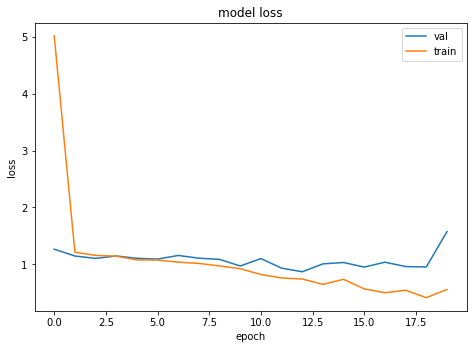

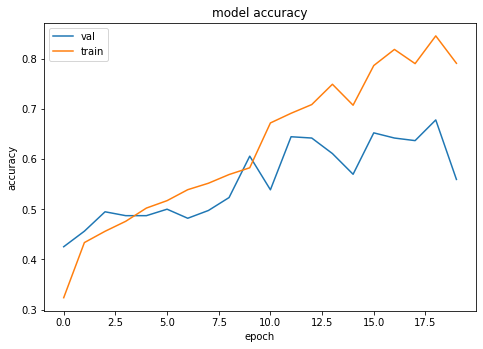

In [ ]:
plot_loss(history)
plot_acc(history)
plt.show(block=False)

In [ ]:
print_par(model, train_dataset_nosh, "test")
print_par(model, val_dataset_nosh, "validation")
plt.show(block=False)

test


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.6994219653179191
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       417
           1       0.94      0.24      0.38       370
           2       0.50      0.97      0.66       406
           3       0.90      0.87      0.88       364

    accuracy                           0.70      1557
   macro avg       0.81      0.69      0.68      1557
weighted avg       0.81      0.70      0.68      1557

validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.5592783505154639
              precision    recall  f1-score   support

           0       0.71      0.46      0.56       104
           1       0.73      0.17      0.28        92
           2       0.41      0.88      0.56       101
           3       0.78      0.70      0.74        91

    accuracy                           0.56       388
   macro avg       0.66      0.55      0.54       388
weighted avg       0.65      0.56      0.54       388



In [ ]:
input = layers.Input(shape=(img_height,img_width,1))
out = layers.Flatten()(input)
out = layers.Dense(4096, activation = 'relu')(out)
out = layers.Dense(2048, activation = 'relu')(out)
out = layers.Dense(4, activation = 'softmax')(out)
model = models.Model(inputs = input, outputs = out)
model.compile(optimizer = optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ["accuracy"])
print(model.summary())
history = model.fit(train_dataset, epochs = 30, validation_data = val_dataset)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 80, 80, 1)]       0         
                                                                 
 flatten_7 (Flatten)         (None, 6400)              0         
                                                                 
 dense_21 (Dense)            (None, 4096)              26218496  
                                                                 
 dense_22 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_23 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 34,617,348
Trainable params: 34,617,348
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
12/49 [======>.................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 65s 1s/step - loss: 5.1268 - accuracy: 0.3211 - val_loss: 1.3403 - val_accuracy: 0.3634
Epoch 2/30
49/49 [==============================] - 61s 1s/step - loss: 1.2269 - accuracy: 0.4367 - val_loss: 1.2455 - val_accuracy: 0.4381
Epoch 3/30
49/49 [==============================] - 61s 1s/step - loss: 1.2081 - accuracy: 0.4297 - val_loss: 1.1240 - val_accuracy: 0.4716
Epoch 4/30
49/49 [==============================] - 64s 1s/step - loss: 1.1046 - accuracy: 0.4945 - val_loss: 1.0679 - val_accuracy: 0.5206
Epoch 5/30
49/49 [==============================] - 61s 1s/step - loss: 1.0908 - accuracy: 0.5119 - val_loss: 1.1043 - val_accuracy: 0.5284
Epoch 6/30
49/49 [==============================] - 61s 1s/step - loss: 1.0805 - accuracy: 0.5132 - val_loss: 1.1122 - val_accuracy: 0.5644
Epoch 7/30
49/49 [==============================] - 63s 1s/step - loss: 0.9745 - accuracy: 0.5915 - val_loss: 0.9962 - val_accuracy: 0.5773
Epoch 8/30
49/49 [=============

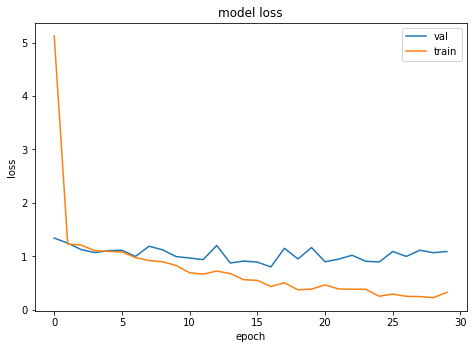

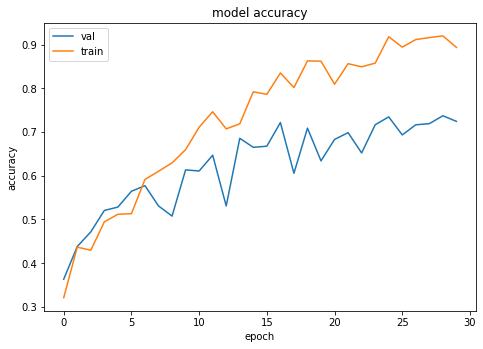

In [ ]:
plot_loss(history)
plot_acc(history)
plt.show(block=False)

In [ ]:
print_par(model, train_dataset_nosh, "test")
print_par(model, val_dataset_nosh, "validation")
plt.show(block=False)

test


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.9100834938985228
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       417
           1       0.81      1.00      0.89       370
           2       0.99      0.97      0.98       406
           3       0.99      0.75      0.85       364

    accuracy                           0.91      1557
   macro avg       0.92      0.91      0.91      1557
weighted avg       0.92      0.91      0.91      1557

validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.7242268041237113
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       104
           1       0.64      0.86      0.73        92
           2       0.83      0.80      0.81       101
           3       0.88      0.54      0.67        91

    accuracy                           0.72       388
   macro avg       0.75      0.72      0.72       388
weighted avg       0.75      0.72      0.72       388



In [ ]:
es_callback = callbacks.EarlyStopping(monitor='val_loss', patience=4)

input = layers.Input(shape=(img_height,img_width,1))
out = layers.Flatten()(input)
out = layers.Dense(4096, activation = 'relu')(out)
out = layers.Dense(2048, activation = 'relu')(out)
out = layers.Dense(4, activation = 'softmax')(out)
model = models.Model(inputs = input, outputs = out)
model.compile(optimizer = optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ["accuracy"])
print(model.summary())
history = model.fit(train_dataset, epochs = 30, validation_data = val_dataset, callbacks=[es_callback])

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 80, 80, 1)]       0         
                                                                 
 flatten_11 (Flatten)        (None, 6400)              0         
                                                                 
 dense_33 (Dense)            (None, 4096)              26218496  
                                                                 
 dense_34 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_35 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 34,617,348
Trainable params: 34,617,348
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
14/49 [=======>...............

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 62s 1s/step - loss: 5.3423 - accuracy: 0.3359 - val_loss: 1.2170 - val_accuracy: 0.4253
Epoch 2/30
49/49 [==============================] - 61s 1s/step - loss: 1.2260 - accuracy: 0.4277 - val_loss: 1.1397 - val_accuracy: 0.5026
Epoch 3/30
49/49 [==============================] - 61s 1s/step - loss: 1.2054 - accuracy: 0.4342 - val_loss: 1.1230 - val_accuracy: 0.5284
Epoch 4/30
49/49 [==============================] - 61s 1s/step - loss: 1.1313 - accuracy: 0.4823 - val_loss: 1.0828 - val_accuracy: 0.5309
Epoch 5/30
49/49 [==============================] - 60s 1s/step - loss: 1.1197 - accuracy: 0.4785 - val_loss: 1.0875 - val_accuracy: 0.5129
Epoch 6/30
49/49 [==============================] - 62s 1s/step - loss: 1.0611 - accuracy: 0.5151 - val_loss: 1.0519 - val_accuracy: 0.5541
Epoch 7/30
49/49 [==============================] - 61s 1s/step - loss: 1.0424 - accuracy: 0.5427 - val_loss: 1.0751 - val_accuracy: 0.5103
Epoch 8/30
49/49 [=============

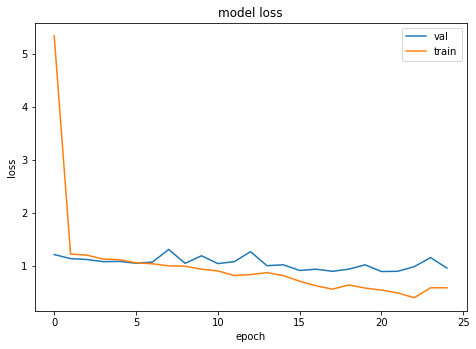

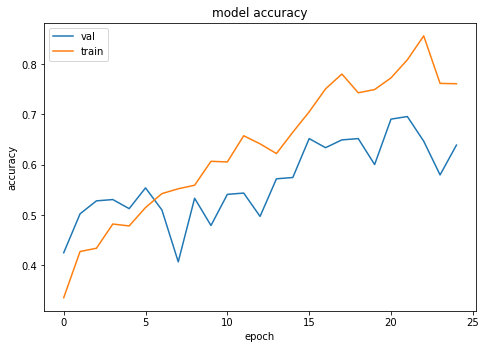

In [ ]:
plot_loss(history)
plot_acc(history)
plt.show(block=False)

In [ ]:
print_par(model, train_dataset_nosh, "test")
print_par(model, val_dataset_nosh, "validation")
plt.show(block=False)

test


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.7842003853564548
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       417
           1       0.78      0.86      0.82       370
           2       0.93      0.68      0.79       406
           3       0.73      0.80      0.77       364

    accuracy                           0.78      1557
   macro avg       0.80      0.79      0.78      1557
weighted avg       0.80      0.78      0.78      1557

validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.6391752577319587
              precision    recall  f1-score   support

           0       0.59      0.66      0.63       104
           1       0.61      0.68      0.65        92
           2       0.76      0.48      0.59       101
           3       0.64      0.75      0.69        91

    accuracy                           0.64       388
   macro avg       0.65      0.64      0.64       388
weighted avg       0.65      0.64      0.64       388



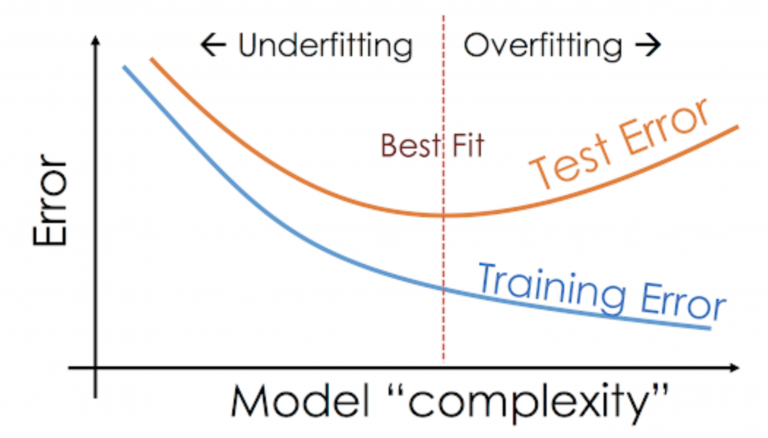

This situation where any given model is performing too well on the training data but the performance drops significantly over the test set is called an overfitting model. On the other hand, if the model is performing poorly over the test and the train set, then we call that an underfitting model.


The distance between train loss and valid loss increased after epoch 20. Hence, it can be seen that there is a possibility of overfitting.

Another way to prevent overfitting is to stop your training process early: Instead of training for a fixed number of epochs, you stop as soon as the validation loss rises — because, after that, your model will generally only get worse with more training. You can implement early stopping easily with a callback in keras

Using multiple epochs allows us to train the model when there is not enough data and to have a better accuracy, we need to train the parameters on multiple epochs.

There are some problems where we don't need more than 1 epoch, but for the best trained model it takes more than one.

As the number of epochs increase, the accuracy of our train data continues to increase, while the accuracy of our test data continues to decrease, indicating overfitting. So there is the risk of overfitting when using lots of epochs.
An overfitted model will not be able to generalize well to the real world as it learns the noise in the data.
Therefore, it is common to initiate training but to discontinue it as soon as overtraining starts.
Validation metrics can be used to detect overfitting.

So, using a higher number of epochs isn't always a good idea.
We should experiment with different epoch sizes to prevent both underfitting and overfitting.

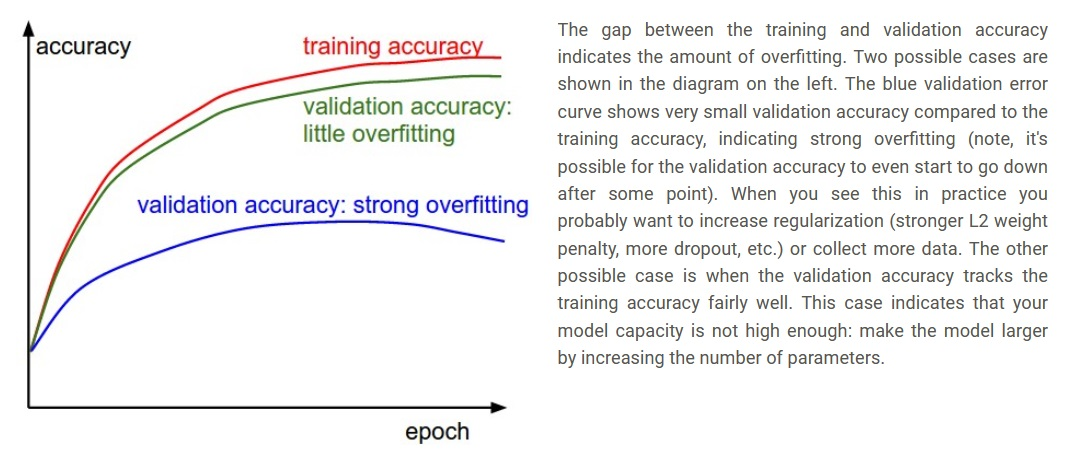

### **Loss functions**

Mean squared error (MSE) is the most commonly used loss function for regression. The loss is the mean overseen data of the squared differences between true and predicted values, or writing it as a formula.

In [ ]:
input = layers.Input(shape=(img_height,img_width,1))
out = layers.Flatten()(input)
out = layers.Dense(4096, activation = 'relu')(out)
out = layers.Dense(2048, activation = 'relu')(out)
out = layers.Dense(4, activation = 'softmax')(out)
model = models.Model(inputs = input, outputs = out)
model.compile(optimizer = optimizers.Adam(learning_rate = 0.001), loss = 'mean_squared_error', metrics = ["accuracy"])
print(model.summary())
history = model.fit(train_dataset, epochs = 20, validation_data = val_dataset)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 80, 80, 1)]       0         
                                                                 
 flatten_7 (Flatten)         (None, 6400)              0         
                                                                 
 dense_21 (Dense)            (None, 4096)              26218496  
                                                                 
 dense_22 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_23 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 34,617,348
Trainable params: 34,617,348
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
 7/49 [===>....................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 62s 1s/step - loss: 0.3657 - accuracy: 0.2563 - val_loss: 0.3698 - val_accuracy: 0.2603
Epoch 2/20
49/49 [==============================] - 60s 1s/step - loss: 0.3696 - accuracy: 0.2608 - val_loss: 0.3698 - val_accuracy: 0.2603
Epoch 3/20
49/49 [==============================] - 61s 1s/step - loss: 0.3696 - accuracy: 0.2608 - val_loss: 0.3698 - val_accuracy: 0.2603
Epoch 4/20
49/49 [==============================] - 60s 1s/step - loss: 0.3696 - accuracy: 0.2608 - val_loss: 0.3698 - val_accuracy: 0.2603
Epoch 5/20
49/49 [==============================] - 61s 1s/step - loss: 0.3696 - accuracy: 0.2608 - val_loss: 0.3698 - val_accuracy: 0.2603
Epoch 6/20
49/49 [==============================] - 60s 1s/step - loss: 0.3696 - accuracy: 0.2608 - val_loss: 0.3698 - val_accuracy: 0.2603
Epoch 7/20
49/49 [==============================] - 61s 1s/step - loss: 0.3696 - accuracy: 0.2608 - val_loss: 0.3698 - val_accuracy: 0.2603
Epoch 8/20
49/49 [=============

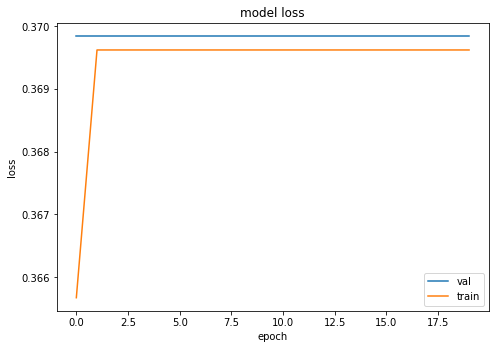

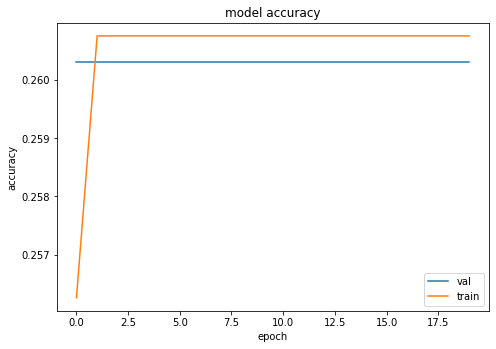

In [ ]:
plot_loss(history)
plot_acc(history)
plt.show(block=False)

In [ ]:
print_par(model, train_dataset_nosh, "test")
print_par(model, val_dataset_nosh, "validation")
plt.show(block=False)

test


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.2607578676942839
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       417
           1       0.00      0.00      0.00       370
           2       0.26      1.00      0.41       406
           3       0.00      0.00      0.00       364

    accuracy                           0.26      1557
   macro avg       0.07      0.25      0.10      1557
weighted avg       0.07      0.26      0.11      1557

validation


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarnin

0.2603092783505155
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       104
           1       0.00      0.00      0.00        92
           2       0.26      1.00      0.41       101
           3       0.00      0.00      0.00        91

    accuracy                           0.26       388
   macro avg       0.07      0.25      0.10       388
weighted avg       0.07      0.26      0.11       388



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Compared with categorical cross entropy, it works worse.
As you can see, the loss value is constant and the weights are not updated, so it does not learn well.  



**There are two reasons why Mean Squared Error(MSE) is a bad choice for binary classification problems:**



1.   First, using MSE means that we assume that the underlying data has been generated from a normal distribution (a bell-shaped curve). In Bayesian terms this means we assume a Gaussian prior. While in reality, a dataset that can be classified into two categories (i.e binary) is not from a normal distribution but a Bernoulli distribution.

2.   
Secondly, the MSE function is non-convex for binary classification. In simple terms, if a binary classification model is trained with MSE Cost function, it is not guaranteed to minimize the Cost function. This is because MSE function expects real-valued inputs in range(-∞, ∞), while binary classification models output probabilities in range(0,1) through the sigmoid/logistic function. 


MSE is used to check how close estimates or forecasts are to actual values. Lower the MSE, the closer is forecast to actual. This is used as a model evaluation measure for regression models and the lower value indicates a better fit.

### **Regularization**

In [ ]:
input = layers.Input(shape=(img_height,img_width,1))
out = layers.Flatten()(input)
out = layers.Dense(4096, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001))(out)
out = layers.Dense(2048, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001))(out)
out = layers.Dense(4, activation = 'softmax', kernel_regularizer=regularizers.l2(0.0001))(out)
model = models.Model(inputs = input, outputs = out)
model.compile(optimizer = optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ["accuracy"])
print(model.summary())
history = model.fit(train_dataset, epochs = 20, validation_data = val_dataset)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 80, 80, 1)]       0         
                                                                 
 flatten_8 (Flatten)         (None, 6400)              0         
                                                                 
 dense_24 (Dense)            (None, 4096)              26218496  
                                                                 
 dense_25 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_26 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 34,617,348
Trainable params: 34,617,348
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
 7/49 [===>....................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 68s 1s/step - loss: 5.4699 - accuracy: 0.3134 - val_loss: 1.8596 - val_accuracy: 0.4407
Epoch 2/20
49/49 [==============================] - 66s 1s/step - loss: 1.8059 - accuracy: 0.4489 - val_loss: 1.8195 - val_accuracy: 0.4691
Epoch 3/20
49/49 [==============================] - 66s 1s/step - loss: 1.6909 - accuracy: 0.4907 - val_loss: 1.6744 - val_accuracy: 0.4691
Epoch 4/20
49/49 [==============================] - 66s 1s/step - loss: 1.6364 - accuracy: 0.4695 - val_loss: 1.5756 - val_accuracy: 0.5361
Epoch 5/20
49/49 [==============================] - 66s 1s/step - loss: 1.5340 - accuracy: 0.5010 - val_loss: 1.4914 - val_accuracy: 0.5825
Epoch 6/20
49/49 [==============================] - 66s 1s/step - loss: 1.5173 - accuracy: 0.5087 - val_loss: 1.5222 - val_accuracy: 0.4845
Epoch 7/20
49/49 [==============================] - 66s 1s/step - loss: 1.4125 - accuracy: 0.5421 - val_loss: 1.4332 - val_accuracy: 0.5361
Epoch 8/20
49/49 [=============

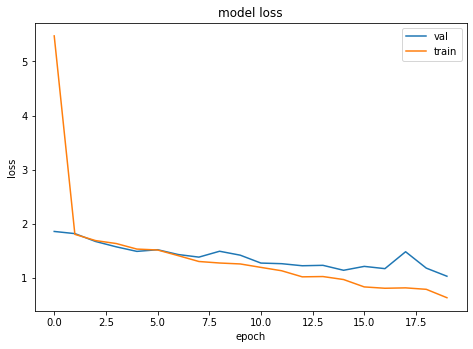

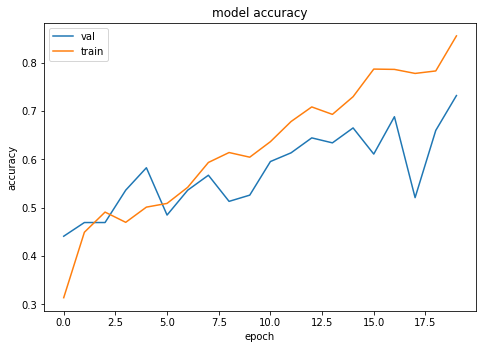

In [ ]:
plot_loss(history)
plot_acc(history)
plt.show(block=False)

In [ ]:
print_par(model, train_dataset_nosh, "test")
print_par(model, val_dataset_nosh, "validation")
plt.show(block=False)

test


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.8972382787411689
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       417
           1       0.83      0.96      0.89       370
           2       0.97      0.85      0.91       406
           3       0.96      0.84      0.90       364

    accuracy                           0.90      1557
   macro avg       0.91      0.90      0.90      1557
weighted avg       0.91      0.90      0.90      1557

validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.7319587628865979
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       104
           1       0.66      0.78      0.72        92
           2       0.83      0.68      0.75       101
           3       0.82      0.71      0.76        91

    accuracy                           0.73       388
   macro avg       0.75      0.73      0.73       388
weighted avg       0.74      0.73      0.73       388



 With L2 regularization, the base error is increased by a fraction of the squared weight values.So we can use it to control our weight.During each training session, each weight is decayed toward zero by a small fraction of its current value. As we can see, the value of weight matrices decreases because it assumes that a neural network with smaller weight matrices leads to simpler models. As a result, it reduces overfitting quite a bit.  


### Dropout

Training one deep neural network with large parameters on the data might lead to overfitting.
Dropout deactivates the neurons randomly at each training step instead of training the data on the original network, we train the data on the network with dropped out nodes. In the next iteration of the training step, the hidden neurons which are deactivated by dropout changes because of its probabilistic behavior. In this way, by applying dropout i.e…deactivating certain individual nodes at random during training we can simulate an ensemble of neural network with different architectures.

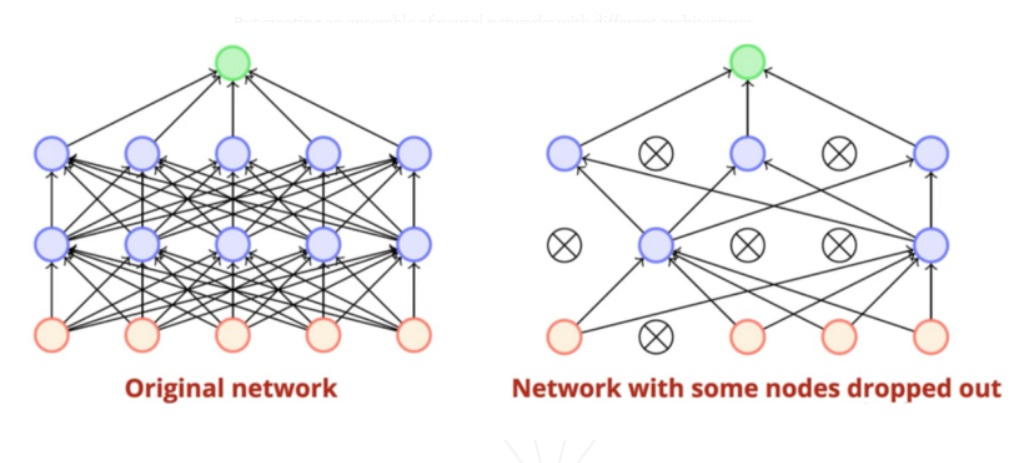

In [ ]:
input = layers.Input(shape=(img_height,img_width,1))
out = layers.Flatten()(input)
out = layers.Dense(4096, activation = 'relu')(out)
out = layers.Dropout(rate=0.1)(out)
out = layers.Dense(2048, activation = 'relu')(out)
out = layers.Dropout(rate=0.1)(out)
out = layers.Dense(4, activation = 'softmax')(out)
model = models.Model(inputs = input, outputs = out)
model.compile(optimizer = optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ["accuracy"])
print(model.summary())
history = model.fit(train_dataset, epochs = 20, validation_data = val_dataset)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 80, 80, 1)]       0         
                                                                 
 flatten_9 (Flatten)         (None, 6400)              0         
                                                                 
 dense_27 (Dense)            (None, 4096)              26218496  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_28 (Dense)            (None, 2048)              8390656   
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_29 (Dense)            (None, 4)                 8196

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 62s 1s/step - loss: 5.1118 - accuracy: 0.3186 - val_loss: 1.3043 - val_accuracy: 0.2990
Epoch 2/20
49/49 [==============================] - 61s 1s/step - loss: 1.2351 - accuracy: 0.4226 - val_loss: 1.1900 - val_accuracy: 0.4613
Epoch 3/20
49/49 [==============================] - 61s 1s/step - loss: 1.1648 - accuracy: 0.4618 - val_loss: 1.1419 - val_accuracy: 0.4613
Epoch 4/20
49/49 [==============================] - 61s 1s/step - loss: 1.1379 - accuracy: 0.4714 - val_loss: 1.0852 - val_accuracy: 0.5335
Epoch 5/20
49/49 [==============================] - 60s 1s/step - loss: 1.1470 - accuracy: 0.4611 - val_loss: 1.0724 - val_accuracy: 0.5000
Epoch 6/20
49/49 [==============================] - 61s 1s/step - loss: 1.1244 - accuracy: 0.4753 - val_loss: 1.1402 - val_accuracy: 0.4588
Epoch 7/20
49/49 [==============================] - 61s 1s/step - loss: 1.1372 - accuracy: 0.4733 - val_loss: 1.1624 - val_accuracy: 0.4330
Epoch 8/20
49/49 [=============

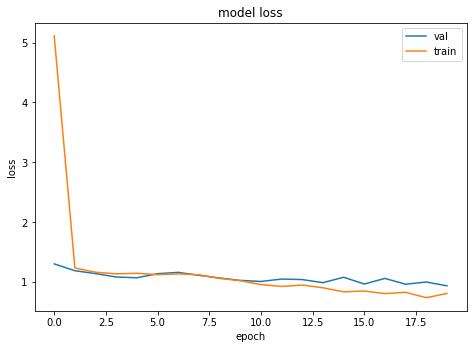

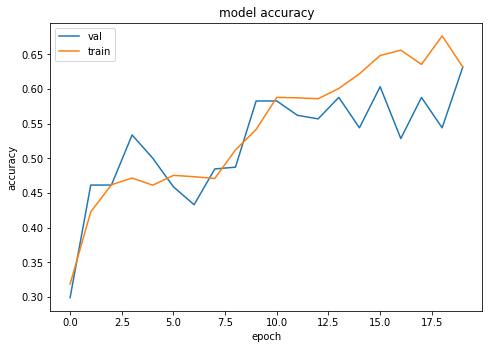

In [ ]:
plot_loss(history)
plot_acc(history)
plt.show(block=False)

In [ ]:
print_par(model, train_dataset_nosh, "test")
print_par(model, val_dataset_nosh, "validation")
plt.show(block=False)

test


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.7109826589595376
              precision    recall  f1-score   support

           0       0.69      0.59      0.64       417
           1       0.77      0.69      0.73       370
           2       0.72      0.82      0.77       406
           3       0.67      0.76      0.71       364

    accuracy                           0.71      1557
   macro avg       0.71      0.71      0.71      1557
weighted avg       0.71      0.71      0.71      1557

validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.6314432989690721
              precision    recall  f1-score   support

           0       0.60      0.54      0.57       104
           1       0.73      0.59      0.65        92
           2       0.58      0.73      0.65       101
           3       0.65      0.67      0.66        91

    accuracy                           0.63       388
   macro avg       0.64      0.63      0.63       388
weighted avg       0.64      0.63      0.63       388



 Dropout performs better than a normal neural network model and helps prevent overfitting.

### Test

In [ ]:
data_gen = ImageDataGenerator(rescale=1./255)
train_dataset_a = data_gen.flow_from_directory(directory=trdirectory, target_size=(img_height,img_width),
                                                color_mode='grayscale',
                                                batch_size= batch_size,
                                                class_mode='categorical')
train_dataset_nosh_a = data_gen.flow_from_directory(directory=trdirectory, target_size=(img_height,img_width),
                                                color_mode='grayscale',
                                                batch_size= batch_size,
                                                class_mode='categorical',
                                                shuffle=False)

test_gen = ImageDataGenerator(rescale=1./255)
test_dataset = test_gen.flow_from_directory(directory= test_dir,
                                            target_size=(img_height,img_width),
                                            color_mode='grayscale',
                                            batch_size= batch_size,
                                            class_mode='categorical')
test_dataset_nosh = test_gen.flow_from_directory(directory= test_dir,
                                            target_size=(img_height,img_width),
                                            color_mode='grayscale',
                                            batch_size= batch_size,
                                            class_mode='categorical',
                                            shuffle=False)


Found 1945 images belonging to 4 classes.
Found 1945 images belonging to 4 classes.
Found 833 images belonging to 4 classes.
Found 833 images belonging to 4 classes.


In [ ]:
input = layers.Input(shape=(img_height,img_width,1))
out = layers.Flatten()(input)
out = layers.Dense(4096, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001))(out)
out = layers.Dense(2048, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001))(out)
out = layers.Dense(4, activation = 'softmax', kernel_regularizer=regularizers.l2(0.0001))(out)
model = models.Model(inputs = input, outputs = out)
model.compile(optimizer = optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ["accuracy"])
print(model.summary())
history = model.fit(train_dataset, epochs = 20, validation_data = val_dataset)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 80, 80, 1)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 6400)              0         
                                                                 
 dense_12 (Dense)            (None, 4096)              26218496  
                                                                 
 dense_13 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_14 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 34,617,348
Trainable params: 34,617,348
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
 8/49 [===>....................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 68s 1s/step - loss: 5.3292 - accuracy: 0.3308 - val_loss: 1.8724 - val_accuracy: 0.4562
Epoch 2/20
49/49 [==============================] - 66s 1s/step - loss: 1.7946 - accuracy: 0.4419 - val_loss: 1.7178 - val_accuracy: 0.4897
Epoch 3/20
49/49 [==============================] - 68s 1s/step - loss: 1.6796 - accuracy: 0.4740 - val_loss: 1.5967 - val_accuracy: 0.5052
Epoch 4/20
49/49 [==============================] - 68s 1s/step - loss: 1.5965 - accuracy: 0.4849 - val_loss: 1.4791 - val_accuracy: 0.5851
Epoch 5/20
49/49 [==============================] - 68s 1s/step - loss: 1.4750 - accuracy: 0.5434 - val_loss: 1.5810 - val_accuracy: 0.4716
Epoch 6/20
49/49 [==============================] - 68s 1s/step - loss: 1.3904 - accuracy: 0.5735 - val_loss: 1.3856 - val_accuracy: 0.5799
Epoch 7/20
49/49 [==============================] - 67s 1s/step - loss: 1.3906 - accuracy: 0.5530 - val_loss: 1.3469 - val_accuracy: 0.5902
Epoch 8/20
49/49 [=============

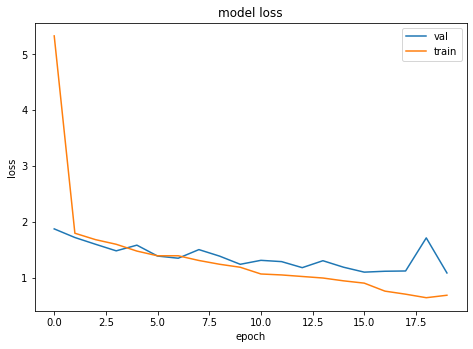

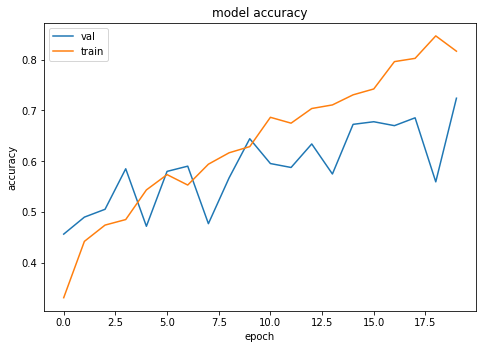

In [ ]:
plot_loss(history)
plot_acc(history)
plt.show(block=False)

In [ ]:
print_par(model, train_dataset_nosh_a, "test")
print_par(model, test_dataset_nosh, "validation")
plt.show(block=False)

test


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.855012853470437
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       521
           1       0.96      0.84      0.90       462
           2       0.84      0.93      0.88       507
           3       0.79      0.85      0.82       455

    accuracy                           0.86      1945
   macro avg       0.86      0.86      0.86      1945
weighted avg       0.86      0.86      0.86      1945

validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.7058823529411765
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       223
           1       0.77      0.67      0.71       198
           2       0.70      0.79      0.74       217
           3       0.67      0.72      0.69       195

    accuracy                           0.71       833
   macro avg       0.71      0.71      0.71       833
weighted avg       0.71      0.71      0.71       833



## We choose NN with momentum = 0.5 and epoch = 20  

In [ ]:
input = layers.Input(shape=(img_height,img_width,1))
out = layers.Flatten()(input)
out = layers.Dense(4096, activation = 'relu')(out)
out = layers.Dense(2048, activation = 'relu')(out)
out = layers.Dense(4, activation = 'softmax')(out)
model = models.Model(inputs = input, outputs = out)
model.compile(optimizer = optimizers.SGD(learning_rate = 0.01, momentum=0.5), loss = 'categorical_crossentropy', metrics = ["accuracy"])
print(model.summary())
history = model.fit(train_dataset, epochs = 20, validation_data = val_dataset)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 80, 80, 1)]       0         
                                                                 
 flatten_5 (Flatten)         (None, 6400)              0         
                                                                 
 dense_15 (Dense)            (None, 4096)              26218496  
                                                                 
 dense_16 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_17 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 34,617,348
Trainable params: 34,617,348
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
 2/49 [>.......................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 62s 1s/step - loss: 1.4110 - accuracy: 0.4014 - val_loss: 1.1139 - val_accuracy: 0.5799
Epoch 2/20
49/49 [==============================] - 61s 1s/step - loss: 1.1195 - accuracy: 0.5164 - val_loss: 1.0517 - val_accuracy: 0.5387
Epoch 3/20
49/49 [==============================] - 60s 1s/step - loss: 1.0428 - accuracy: 0.5620 - val_loss: 1.0270 - val_accuracy: 0.5928
Epoch 4/20
49/49 [==============================] - 60s 1s/step - loss: 0.9851 - accuracy: 0.5832 - val_loss: 1.0705 - val_accuracy: 0.5593
Epoch 5/20
49/49 [==============================] - 63s 1s/step - loss: 0.8956 - accuracy: 0.6493 - val_loss: 0.9395 - val_accuracy: 0.6392
Epoch 6/20
49/49 [==============================] - 60s 1s/step - loss: 0.8731 - accuracy: 0.6622 - val_loss: 0.9734 - val_accuracy: 0.5825
Epoch 7/20
49/49 [==============================] - 60s 1s/step - loss: 0.8202 - accuracy: 0.6814 - val_loss: 0.9265 - val_accuracy: 0.6314
Epoch 8/20
49/49 [=============

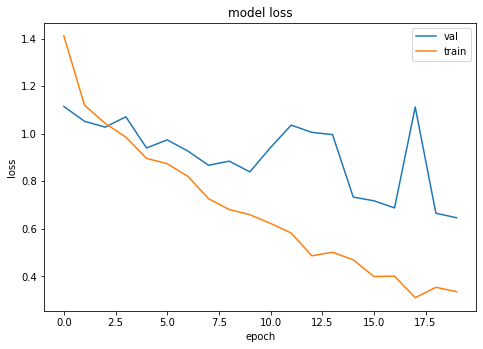

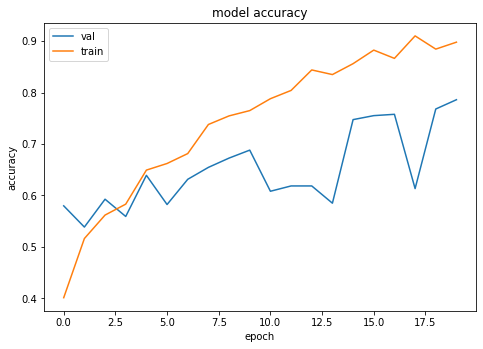

In [ ]:
plot_loss(history)
plot_acc(history)
plt.show(block=False)

In [ ]:
print_par(model, train_dataset_nosh_a, "test")
print_par(model, test_dataset_nosh, "validation")
plt.show(block=False)

test


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.9187660668380463
              precision    recall  f1-score   support

           0       0.85      0.96      0.91       521
           1       0.89      0.97      0.93       462
           2       0.97      0.93      0.95       507
           3       0.99      0.80      0.89       455

    accuracy                           0.92      1945
   macro avg       0.93      0.92      0.92      1945
weighted avg       0.93      0.92      0.92      1945

validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0.7743097238895558
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       223
           1       0.72      0.86      0.78       198
           2       0.86      0.73      0.79       217
           3       0.91      0.66      0.77       195

    accuracy                           0.77       833
   macro avg       0.80      0.77      0.77       833
weighted avg       0.79      0.77      0.77       833



In [ ]:
dataset = test_dataset_nosh

prediction = model.predict(dataset)
predictions = np.argmax(prediction, axis = 1)
print(classification_report(dataset.labels, predictions))


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.69      0.84      0.76       223
           1       0.72      0.86      0.78       198
           2       0.86      0.73      0.79       217
           3       0.91      0.66      0.77       195

    accuracy                           0.77       833
   macro avg       0.80      0.77      0.77       833
weighted avg       0.79      0.77      0.77       833



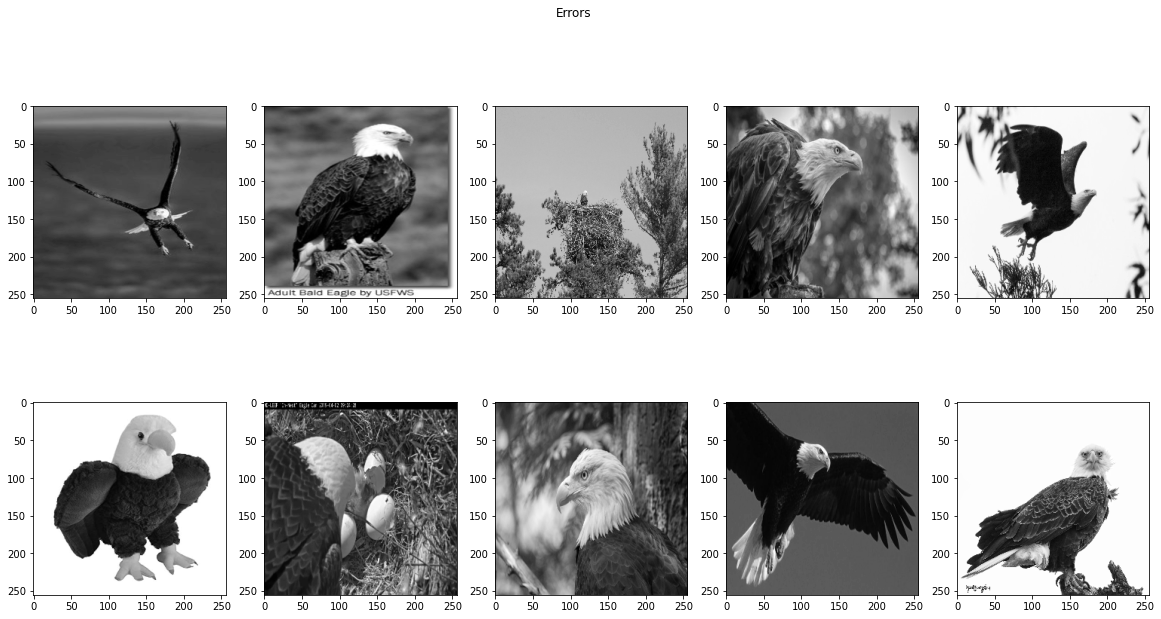

In [ ]:
errors = np.where(predictions != dataset.classes)[0]

test_dir = '/content/dataset/test/'

fig, axs = plt.subplots(2, 5, figsize=(20,10))
fig.suptitle("Errors")
for i in range(2):
  for j in range(5):
    img = cv2.imread(test_dir+dataset.filenames[errors[i*5 + j]], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (256,256))
    axs[i][j].imshow(img.reshape(256, 256), cmap = 'gray')


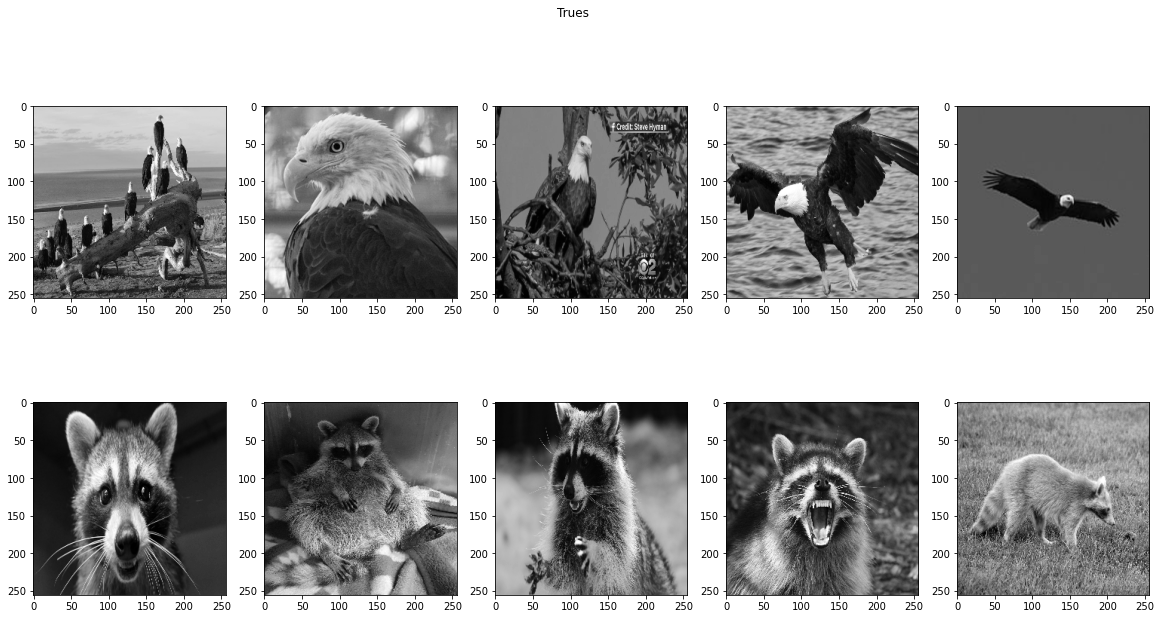

In [ ]:
tpredc = np.where(predictions == dataset.classes)[0]

test_dir = '/content/dataset/test/'

fig, axs = plt.subplots(2, 5, figsize=(20,10))
fig.suptitle("Trues")
for i in range(2):
  for j in range(5):
    img = cv2.imread(test_dir+dataset.filenames[tpredc[100*i*5 + j]], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (256,256))
    axs[i][j].imshow(img.reshape(256, 256), cmap = 'gray')




When a model predicts the wrong item, it could be because it has not been trained long enough. Additionally, we do not have enough data to use machine learning to make accurate predictions.

There might be noise in the values.

There may be additional data that we do not need, such as a mark or text in photos.

The size of the machine learning model is also an important hyperparameter. A too small model leads to underfitting, but a too large model leads to overfitting.


In [ ]:
img_height = 64
img_width = 64
train_dataset_nosh_a = data_gen.flow_from_directory(directory=trdirectory, target_size=(img_height,img_width),
                                                color_mode='grayscale',
                                                batch_size= batch_size,
                                                class_mode='categorical',
                                                shuffle=False)
x_train=np.concatenate([train_dataset_nosh_a.next()[0] for i in range(train_dataset_nosh_a.__len__())])
print(x_train.shape)

Found 1945 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


(1945, 64, 64, 1)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_train.shape

(1945, 4096)

In [ ]:
test_dataset_nosh = test_gen.flow_from_directory(directory= test_dir,
                                            target_size=(img_height,img_width),
                                            color_mode='grayscale',
                                            batch_size= batch_size,
                                            class_mode='categorical',
                                            shuffle=False)
x_test = np.concatenate([test_dataset_nosh.next()[0] for i in range(test_dataset_nosh.__len__())])
x_test.shape

Found 833 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


(833, 64, 64, 1)

In [ ]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
x_test.shape

(833, 4096)

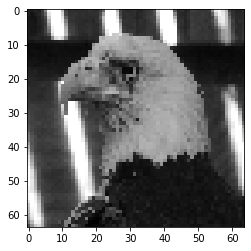

In [ ]:
plt.imshow(x_train[0].reshape(img_height,img_width), cmap='gray');

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
autoencoder = Sequential()

# Encode
autoencoder.add(Dense(units = 2048, activation='relu', input_dim = 4096))
autoencoder.add(Dense(units = 1024, activation='relu'))
autoencoder.add(Dense(units = 784, activation='relu')) # Encoded image

# Decode

autoencoder.add(Dense(units = 1024, activation='relu'))
autoencoder.add(Dense(units = 2048, activation='relu'))
autoencoder.add(Dense(units = 4096, activation='sigmoid'))

In [ ]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_53 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_54 (Dense)            (None, 784)               803600    
                                                                 
 dense_55 (Dense)            (None, 1024)              803840    
                                                                 
 dense_56 (Dense)            (None, 2048)              2099200   
                                                                 
 dense_57 (Dense)            (None, 4096)              8392704   
                                                                 
Total params: 22,588,176
Trainable params: 22,588,176


In [ ]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
autoencoder.fit(x_train, x_train, epochs=50)

Epoch 1/50
61/61 [==============================] - 14s 213ms/step - loss: 0.6717 - accuracy: 0.0000e+00
Epoch 2/50
61/61 [==============================] - 13s 211ms/step - loss: 0.6564 - accuracy: 5.1414e-04
Epoch 3/50
61/61 [==============================] - 13s 213ms/step - loss: 0.6367 - accuracy: 0.0000e+00
Epoch 4/50
61/61 [==============================] - 13s 212ms/step - loss: 0.6204 - accuracy: 5.1414e-04
Epoch 5/50
61/61 [==============================] - 13s 213ms/step - loss: 0.6174 - accuracy: 0.0010
Epoch 6/50
61/61 [==============================] - 13s 211ms/step - loss: 0.6159 - accuracy: 0.0015
Epoch 7/50
61/61 [==============================] - 13s 212ms/step - loss: 0.6149 - accuracy: 0.0010
Epoch 8/50
61/61 [==============================] - 13s 214ms/step - loss: 0.6100 - accuracy: 0.0010
Epoch 9/50
61/61 [==============================] - 13s 212ms/step - loss: 0.6081 - accuracy: 0.0010
Epoch 10/50
61/61 [==============================] - 13s 211ms/step - loss:

In [ ]:
autoencoder.input

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'dense_52_input')>

In [ ]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_53 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_54 (Dense)            (None, 784)               803600    
                                                                 
 dense_55 (Dense)            (None, 1024)              803840    
                                                                 
 dense_56 (Dense)            (None, 2048)              2099200   
                                                                 
 dense_57 (Dense)            (None, 4096)              8392704   
                                                                 
Total params: 22,588,176
Trainable params: 22,588,176


In [ ]:
autoencoder.get_layer('dense_54').output

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_54')>

In [ ]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('dense_54').output)
encoder.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52_input (InputLayer)  [(None, 4096)]           0         
                                                                 
 dense_52 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_53 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_54 (Dense)            (None, 784)               803600    
                                                                 
Total params: 11,292,432
Trainable params: 11,292,432
Non-trainable params: 0
_________________________________________________________________


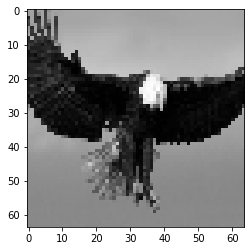

In [ ]:
plt.imshow(x_test[7].reshape(img_height, img_width), cmap='gray');

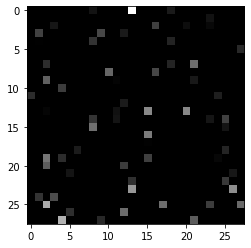

In [ ]:
encoded_image = encoder.predict(x_test[7].reshape(1,-1))
plt.imshow(encoded_image.reshape(28,28), cmap='gray');

In [ ]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_53 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_54 (Dense)            (None, 784)               803600    
                                                                 
 dense_55 (Dense)            (None, 1024)              803840    
                                                                 
 dense_56 (Dense)            (None, 2048)              2099200   
                                                                 
 dense_57 (Dense)            (None, 4096)              8392704   
                                                                 
Total params: 22,588,176
Trainable params: 22,588,176


In [ ]:
decoder = Model(inputs = autoencoder.get_layer('dense_54').output, outputs = autoencoder.get_layer('dense_57').output)

In [ ]:
decoder.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_55 (Dense)            (None, 1024)              803840    
                                                                 
 dense_56 (Dense)            (None, 2048)              2099200   
                                                                 
 dense_57 (Dense)            (None, 4096)              8392704   
                                                                 
Total params: 11,295,744
Trainable params: 11,295,744
Non-trainable params: 0
_________________________________________________________________


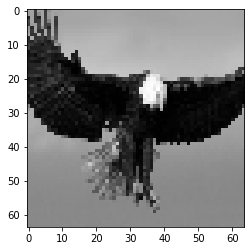

In [ ]:
decoded_image = decoder.predict(encoded_image)
plt.imshow(x_test[7].reshape(img_height, img_width), cmap = 'gray');

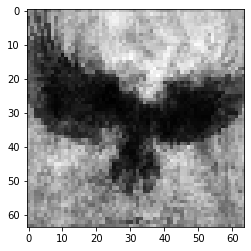

In [ ]:
plt.imshow(decoded_image.reshape(img_height, img_width), cmap='gray');